In [2]:
import requests
from bs4 import BeautifulSoup
import numpy as np
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
import datetime

In [3]:
url = "https://tass.ru/tbp/api/v1/search?limit=20&last_es_updated_dt=2023-12-06T10:15:33.648729&lang=ru&sort=-es_updated_dt"

page = requests.get(url)
page.text

'{"result":[{"id":19466945,"composite_id":"19466945","type":"news","status":"published","title":"Мишустин ожидает рост ВВП по итогам года на уровне 3%","subtitle":"","lead":"Премьер-министр РФ обратил внимание на то, что об успехах России говорят даже оппоненты, которые \\"открыто признают, что санкции не действуют\\"","url":"/ekonomika/19466945","lang":"ru","urgency":"normal","main_media":{"gallery":null,"image":null,"video":null},"main_rubric_id":25,"rubrics":[{"id":25,"name":"Экономика и бизнес","url":"/ekonomika","type":"rubric"}],"tags":[{"id":3539,"name":"Мишустин, Михаил Владимирович","url":"/mishustin-mihail-vladimirovich"},{"id":3929,"name":"Россия","url":"/rossiya"}],"published_dt":"2023-12-06T10:09:14","publish_updated_dt":"2023-12-06T10:15:33","updated_dt":"2023-12-06T12:53:02","es_updated_dt":"2023-12-06T10:15:33.261510","meta_title":"Мишустин ожидает рост ВВП по итогам года на уровне 3%","meta_description":"Премьер-министр РФ обратил внимание на то, что об успехах России 

In [4]:
page.json()['result']

[{'id': 19466945,
  'composite_id': '19466945',
  'type': 'news',
  'status': 'published',
  'title': 'Мишустин ожидает рост ВВП по итогам года на уровне 3%',
  'subtitle': '',
  'lead': 'Премьер-министр РФ обратил внимание на то, что об успехах России говорят даже оппоненты, которые "открыто признают, что санкции не действуют"',
  'url': '/ekonomika/19466945',
  'lang': 'ru',
  'urgency': 'normal',
  'main_media': {'gallery': None, 'image': None, 'video': None},
  'main_rubric_id': 25,
  'rubrics': [{'id': 25,
    'name': 'Экономика и бизнес',
    'url': '/ekonomika',
    'type': 'rubric'}],
  'tags': [{'id': 3539,
    'name': 'Мишустин, Михаил Владимирович',
    'url': '/mishustin-mihail-vladimirovich'},
   {'id': 3929, 'name': 'Россия', 'url': '/rossiya'}],
  'published_dt': '2023-12-06T10:09:14',
  'publish_updated_dt': '2023-12-06T10:15:33',
  'updated_dt': '2023-12-06T12:53:02',
  'es_updated_dt': '2023-12-06T10:15:33.261510',
  'meta_title': 'Мишустин ожидает рост ВВП по итогам 

2024-04-25T19:22:47.065448
2024-04-25T19:03:11.613629

In [7]:
import datetime


date = page.json()['result'][0]
full_date = datetime.datetime.strptime(date['es_updated_dt'], "%Y-%m-%dT%H:%M:%S.%f")
full_date.date() >= datetime.date(2020, 1, 1)

True

In [8]:
import pandas as pd
table_init = {
            "id" : [1],
            "date" : [datetime.datetime(2025,1,1).date()],
            "path" : ["path"],
            "type" : ["type"],
            "text" : ["text"]
        }
main_df = pd.DataFrame(table_init)

table_init["date"][0]

datetime.date(2025, 1, 1)

In [9]:
browser = webdriver.Chrome(service=Service(executable_path="/Users/kosarenok/Developer/chromedriver"))

In [5]:
HEADERS = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9,ru;q=0.8,af;q=0.7"
}

In [50]:
article = "https://tass.ru" + page.json()['result'][15]['url']
# article = "https://nauka.tass.ru"  + page.json()['result'][4]['url']
print(article)
response = requests.get(article, headers=HEADERS)
soup = BeautifulSoup(response.text, "html.parser")

https://tass.ru/mezhdunarodnaya-panorama/19466723


In [51]:
response.history

[<Response [302]>]

In [29]:
soup.find(name="article").find_all(string=True)

AttributeError: 'NoneType' object has no attribute 'find_all'

In [32]:
"http" in page.json()['result'][15]['url']

True

In [55]:
import re

tieme = "2023-10-02T00:21:14.000000"
bool(re.search(r"\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}\.\d{6}", tieme))
# datetime.datetime.strptime(tieme, "%Y-%m-%dT%H:%M:%S.%f")

True

In [12]:
result = page.json()['result'][3]
path = page.json()['result'][4]['url']
path.split('/')[1]


'nauka'

In [13]:
current_date = datetime.datetime.strptime(result['es_updated_dt'], "%Y-%m-%dT%H:%M:%S.%f")
path = result["url"]

if (current_date >= datetime.datetime(2021, 1, 1)) and (current_date <= datetime.datetime(2022, 1, 1)):
            print("aboba")

aboba


In [33]:
main_df = pd.read_csv("Data/tass_data.csv")
main_df

,id,date,path,type,text
0,1,2025-01-01,path,type,text
1,19658485,2023-12-31 21:04:00.649294,/mezhdunarodnaya-panorama/19658485,news,"брюссель, 1 января. /тасс/. ""защитить. укрепит..."
2,19658081,2023-12-30 17:28:37.945804,/obschestvo/19658081,news,"москва, 30 декабря. /тасс/. упрощенное получен..."
3,19655553,2023-12-30 08:03:57.112826,/obschestvo/19655553,news,"санкт-петербург, 30 декабря. /тасс/. ленинград..."
4,19655421,2023-12-30 07:07:58.121252,/mezhdunarodnaya-panorama/19655421,news,"бишкек, 30 декабря. /тасс/. снежный барс офици..."
5,19655123,2023-12-30 02:41:21.919705,/obschestvo/19655123,news,"улан-удэ, 30 декабря. /тасс/. байкальский запо..."
6,19655015,2023-12-30 00:21:46.591290,/obschestvo/19655015,news,"москва, 30 декабря. /тасс/. составление списка..."
7,19654081,2023-12-29 18:09:37.847345,/ekonomika/19654081,news,"великий новгород, 29 декабря. /тасс/. власти н..."
8,19652403,2023-12-29 12:04:48.090423,/obschestvo/19652403,news,"москва, 29 декабря. /тасс/. лесовосстановитель..."
9,19652313,2023-12-29 11:51:09.788906,/obschestvo/19652313,news,"москва, 29 декабря. /тасс/. контроль за уличны..."


In [34]:
main_df.to_csv(path_or_buf="Data/tass_data.csv", index=False)

In [14]:
browser.get(article)

In [15]:
text_article = soup.find("article").find_all(string=True) # type: ignore
read_more = np.where(np.atleast_1d(text_article) == "Читайте также")
if len(read_more[0]) > 0:
            for index in read_more[0]:
                print(index)
                index = int(index)
                del text_article[index:index + 1]
# del text_article[read_more_index:read_more_index+1]
# " ".join(text_article).lower()

AttributeError: 'NoneType' object has no attribute 'find_all'

<html><head><meta content="noindex, noarchive" name="robots"/><style>.gorizontal-vertikal {position: absolute;margin: auto;top: 0;right: 0;bottom: 0;left: 0;width: 66px;height: 66px;}</style></head>
<body><div class="gorizontal-vertikal"></div>
<script>
            var utm_set = null;
            function setup_utm(){ if (utm_set == null) return null; var i=0; var p = document.createElement("a"); p.href = document.referrer; for (i=0; i<utm_set.length; i++) { if (p.hostname == utm_set[i]["host"] || p.hostname.indexOf(utm_set[i]["host"] + '.') == 0 || p.hostname.indexOf('www.' + utm_set[i]["host"] + '.') == 0) { return utm_set[i]["args"]; } } return null;}
            function fixedEncodeURIComponent(str) {return encodeURIComponent(str).replace(/[!'()*]/g, function (c) { return "%" + c.charCodeAt(0).toString(16); });}
            function get_jhash(b) {var x = 123456789;var i = 0; var k = 0;for (i = 0; i < 1677696; i++) {x = ((x + b) ^ (x + (x % 3) + (x % 17) + b) ^ i) % 16776960;if (x %
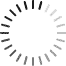

In [ ]:
soup

In [ ]:
soup.find_all("div", attrs={"class" : "text-block"})


[]

In [ ]:
import re


text_article = soup.find("article").find_all(string=True) # type: ignore
read_more = np.where(np.atleast_1d(text_article) == "Читайте также")
len(read_more[0])
if len(read_more[0]) > 0:
    read_more_index = read_more[0]
    print("ab")
    del text_article[read_more_index:read_more_index + 1]
    

In [ ]:
soup.find("article").find_all("p", {"class" : "Paragraph_paragraph__nYCys"})[2].get_text()

'Президент США Джо Байден подписал в среду утвержденный ранее Конгрессом пакет законов, в том числе об оказании помощи Украине. 20 апреля законопроекты были одобрены Палатой представителей Конгресса США, а 23 апреля их утвердил Сенат. Объем пакета составил $95 млрд. Он включает, помимо $61 млрд для Украины, $26 млрд для Израиля, а также средства на оказание гуманитарной помощи мирному населению в зонах конфликта, в том числе в секторе Газа.\xa0'

In [ ]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize


stemmer = SnowballStemmer("russian")
text = ["Экология", "Окружающая среда", "Природа", "Экосистема", "Экологическое состояние", "Природные ресурсы", "Биоразнообразие", "Экологическая политика", "Экологический кризис", "Сохранение природы", "Энвайронментализм", "Устойчивое развитие", "Зеленая экономика"]
# text = ' '.join(text)
# tokens = word_tokenize(text, language="russian")
new_words_list = []
for words in text:
    word_list = words.split(" ")
    stemmed_words = [stemmer.stem(word) for word in word_list]
    sentense = ' '.join(stemmed_words)
    new_words_list.append(sentense)

print(new_words_list)




['эколог', 'окружа сред', 'природ', 'экосистем', 'экологическ состоян', 'природн ресурс', 'биоразнообраз', 'экологическ политик', 'экологическ кризис', 'сохранен природ', 'энвайронментализм', 'устойчив развит', 'зелен экономик']


In [ ]:
'окружа сред' in "окружающая"

False